In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV, cross_val_score

from matplotlib import pyplot as plt
import seaborn as sns

### Load California Housing data bunch from SciKit Learn and show keys

In [18]:
boston = datasets.fetch_california_housing()

print(boston.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


### Construct a Pandas dataframe of the data and target

In [19]:
df = pd.DataFrame(boston['data'])
df.columns = boston['feature_names']

df['PRICE'] = boston['target']

In [20]:
X = df.drop(['PRICE'], axis= 1).copy()
y = df.PRICE.copy()

### Split data into Training and Testing

In [21]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size= 0.2, random_state= 303)

print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


# Instantiate and fit a Decision Tree Regressor
- Use default hyperparameters

In [22]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state= 80208)
dec_tree.fit(X= X_train, y= y_train)

print(f'Max Depth of tree: {dec_tree.get_depth()}')

Max Depth of tree: 35


### Error

In [23]:
print(f'Error from Training Data: {np.sqrt(mean_squared_error(y_pred= dec_tree.predict(X_train), y_true= y_train))}')
print(f'Error from Testing Data: {np.sqrt(mean_squared_error(y_pred= dec_tree.predict(X_test), y_true= y_test))}')


Error from Training Data: 2.712443728697255e-16
Error from Testing Data: 0.7103652878514873


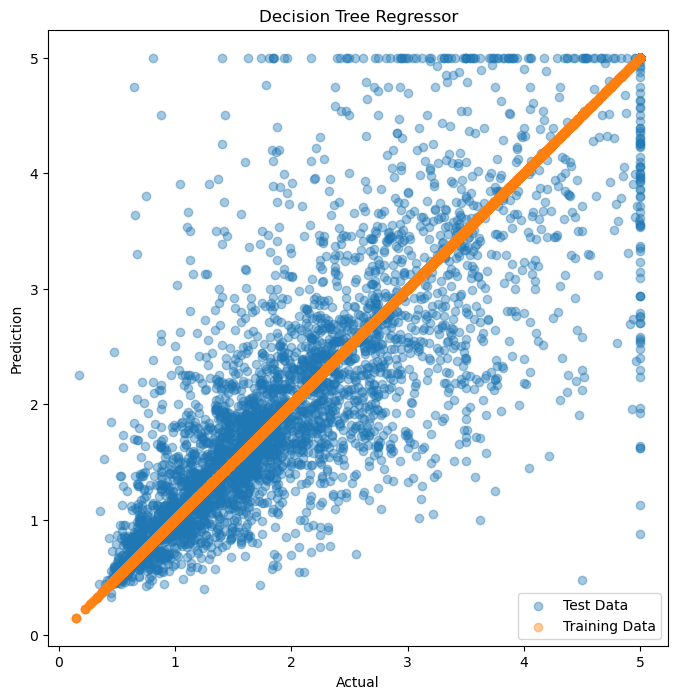

In [24]:
plt.figure(figsize= (8, 8))
plt.scatter(x= y_test, y= dec_tree.predict(X_test), label= 'Test Data', alpha= 0.4)
plt.scatter(x= y_train, y= dec_tree.predict(X_train), label= 'Training Data', alpha= 0.4)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Decision Tree Regressor')
plt.legend()
plt.show()

## Demonstrate usage of cross_val_score

In [29]:
dec_tree_reg = DecisionTreeRegressor(min_samples_leaf= 20)

cross_val_score(estimator= dec_tree_reg, X= X_train, y= y_train, cv= 5, scoring= 'neg_mean_squared_error')

array([-0.40026224, -0.37392987, -0.39026294, -0.37972336, -0.35113034])

## Use Grid Search with Cross Validation to find a less overfit Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [12]:
dec_tree_tuned = DecisionTreeRegressor(random_state= 80208)

In [13]:
dec_tree = DecisionTreeRegressor(random_state= 80208)

dec_tree_grid = {'max_depth':[1, 5, 9, 13, 17, 19, 21, None],
                }

tree_grid_search = GridSearchCV(dec_tree_tuned, 
                                dec_tree_grid, 
                                cv= 5, 
                                verbose= 5, 
                                scoring= 'neg_mean_squared_error')

In [14]:
%%time
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......................max_depth=1;, score=-0.958 total time=   0.0s
[CV 2/5] END ......................max_depth=1;, score=-0.948 total time=   0.0s
[CV 3/5] END ......................max_depth=1;, score=-0.914 total time=   0.0s
[CV 4/5] END ......................max_depth=1;, score=-0.943 total time=   0.0s
[CV 5/5] END ......................max_depth=1;, score=-0.888 total time=   0.0s
[CV 1/5] END ......................max_depth=5;, score=-0.554 total time=   0.1s
[CV 2/5] END ......................max_depth=5;, score=-0.532 total time=   0.1s
[CV 3/5] END ......................max_depth=5;, score=-0.502 total time=   0.1s
[CV 4/5] END ......................max_depth=5;, score=-0.525 total time=   0.1s
[CV 5/5] END ......................max_depth=5;, score=-0.486 total time=   0.1s
[CV 1/5] END ......................max_depth=9;, score=-0.451 total time=   0.1s
[CV 2/5] END ......................max_depth=9;, 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=80208),
             param_grid={'max_depth': [1, 5, 9, 13, 17, 19, 21, None]},
             scoring='neg_mean_squared_error', verbose=5)

In [15]:
tree_grid_search.best_params_

{'max_depth': 9}

In [16]:
print(f'Error from Training Data: {np.sqrt(mean_squared_error(y_pred= tree_grid_search.predict(X_train), y_true= y_train))}')
print(f'Error from Testing Data: {np.sqrt(mean_squared_error(y_pred= tree_grid_search.predict(X_test), y_true= y_test))}')


Error from Training Data: 0.5263089340404251
Error from Testing Data: 0.6312343977266691


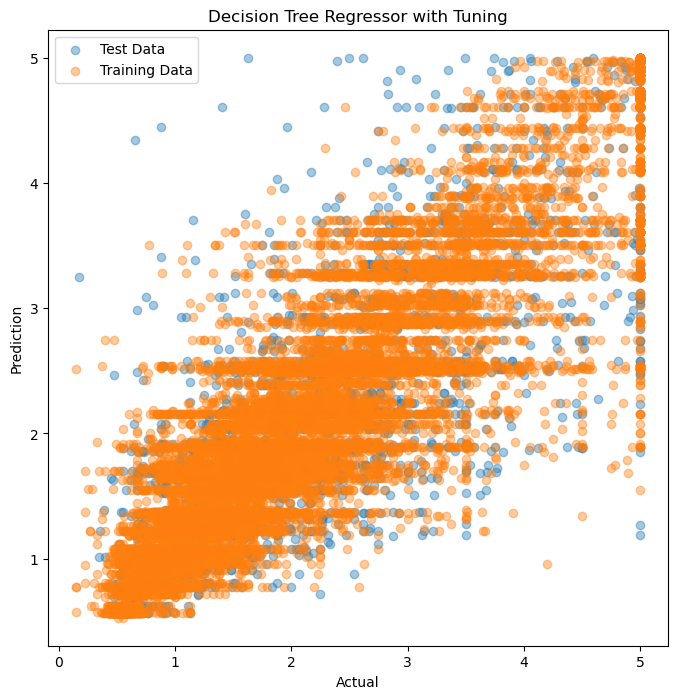

In [24]:
plt.figure(figsize= (8, 8))
plt.scatter(x= y_test, y= tree_grid_search.predict(X_test), label= 'Test Data', alpha= 0.4)
plt.scatter(x= y_train, y= tree_grid_search.predict(X_train), label= 'Training Data', alpha= 0.4)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Decision Tree Regressor with Tuning')
plt.legend()
plt.show()

#### Cross Validation results

In [25]:
tree_grid_search.cv_results_

{'mean_fit_time': array([0.02205367, 0.05598607, 0.09957356, 0.13162632, 0.16010966,
        0.15385818, 0.16616273, 0.16211901]),
 'std_fit_time': array([0.00934173, 0.00572504, 0.00772517, 0.00458595, 0.01773656,
        0.00714884, 0.00621716, 0.01242027]),
 'mean_score_time': array([0.00258369, 0.00275264, 0.00248528, 0.0031137 , 0.00324364,
        0.00353746, 0.00325046, 0.00336595]),
 'std_score_time': array([0.00094175, 0.00083344, 0.00019407, 0.00071958, 0.00033796,
        0.0003294 , 0.00047341, 0.00053208]),
 'param_max_depth': masked_array(data=[1, 5, 9, 13, 17, 19, 21, None],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_depth': 5},
  {'max_depth': 9},
  {'max_depth': 13},
  {'max_depth': 17},
  {'max_depth': 19},
  {'max_depth': 21},
  {'max_depth': None}],
 'split0_test_score': array([-0.95805405, -0.55410352, -0.45100574, -0.51480268, -0.56544389,
  

# Instantiate and fit a Random Forest Regressor
- Use default hyperparameters

In [26]:
from sklearn.ensemble import RandomForestRegressor
rand_for = RandomForestRegressor(random_state= 80208)
rand_for.fit(X= X_train, y= y_train)

RandomForestRegressor(random_state=80208)

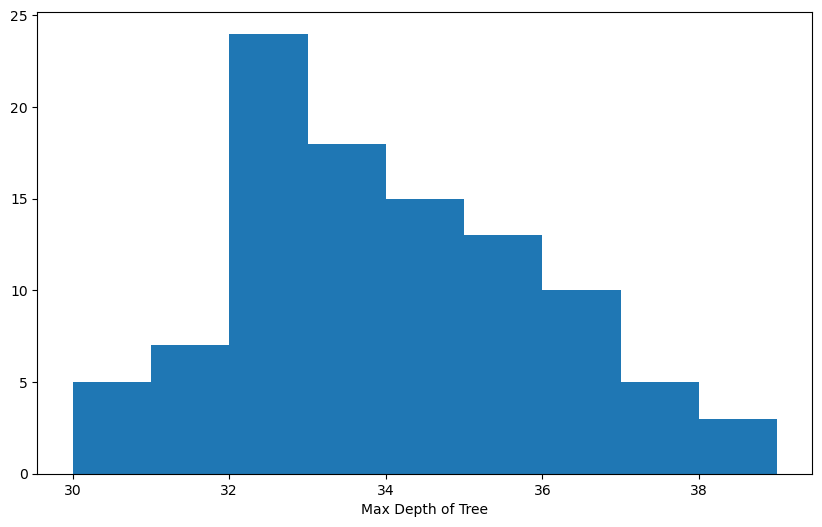

In [27]:
rf_tree_depths = []
for i in np.arange(0, rand_for.n_estimators, 1):
    rf_tree_depths.append(rand_for.estimators_[i].tree_.max_depth)
    
    
rf_tree_depths = np.array(rf_tree_depths)

plt.figure(figsize= (10, 6))
plt.hist(rf_tree_depths, bins= np.arange(rf_tree_depths.min(), rf_tree_depths.max()+1))
plt.xlabel('Max Depth of Tree')
plt.show()

### Error

In [28]:
print(f'Error from Training Data: {np.sqrt(mean_squared_error(y_pred= rand_for.predict(X_train), y_true= y_train))}')
print(f'Error from Testing Data: {np.sqrt(mean_squared_error(y_pred= rand_for.predict(X_test), y_true= y_test))}')


Error from Training Data: 0.1879964089336687
Error from Testing Data: 0.49763125408079184


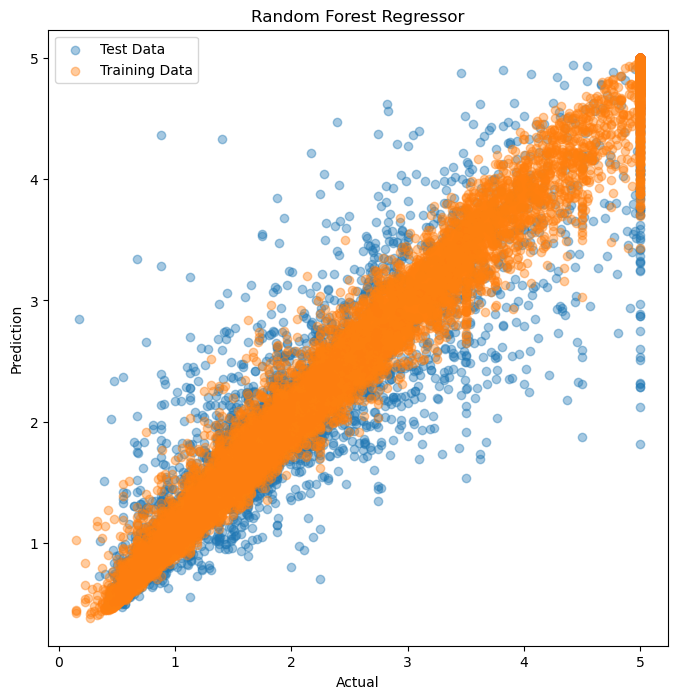

In [29]:
plt.figure(figsize= (8, 8))
plt.scatter(x= y_test, y= rand_for.predict(X_test), label= 'Test Data', alpha= 0.4)
plt.scatter(x= y_train, y= rand_for.predict(X_train), label= 'Training Data', alpha= 0.4)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Random Forest Regressor')
plt.legend()
plt.show()

# Hyperparameter Tuning with Cross Validation

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [30]:
from sklearn.ensemble import RandomForestRegressor

rand_forst = RandomForestRegressor(random_state= 80210)

param_grid = {'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200, 225, 250],        
              'max_features': [0.25, 0.5, 0.75, 1.0],
             }

grid_search = GridSearchCV(estimator= rand_forst, param_grid= param_grid, cv= 5, verbose= 5, scoring= 'neg_mean_squared_error')

In [32]:
print(f'Total number of combinations to attempt: {len(param_grid["n_estimators"]) * len(param_grid["max_features"])}')
print(f'Number of Trees\t\tFraction of Features')
for n in param_grid['n_estimators']:
    print(f'{n}\t\t\t{param_grid["max_features"]}')

Total number of combinations to attempt: 40
Number of Trees		Fraction of Features
25			[0.25, 0.5, 0.75, 1.0]
50			[0.25, 0.5, 0.75, 1.0]
75			[0.25, 0.5, 0.75, 1.0]
100			[0.25, 0.5, 0.75, 1.0]
125			[0.25, 0.5, 0.75, 1.0]
150			[0.25, 0.5, 0.75, 1.0]
175			[0.25, 0.5, 0.75, 1.0]
200			[0.25, 0.5, 0.75, 1.0]
225			[0.25, 0.5, 0.75, 1.0]
250			[0.25, 0.5, 0.75, 1.0]


In [33]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END max_features=0.25, n_estimators=25;, score=-0.286 total time=   0.9s
[CV 2/5] END max_features=0.25, n_estimators=25;, score=-0.262 total time=   0.9s
[CV 3/5] END max_features=0.25, n_estimators=25;, score=-0.256 total time=   0.9s
[CV 4/5] END max_features=0.25, n_estimators=25;, score=-0.271 total time=   0.9s
[CV 5/5] END max_features=0.25, n_estimators=25;, score=-0.247 total time=   0.8s
[CV 1/5] END max_features=0.25, n_estimators=50;, score=-0.271 total time=   1.8s
[CV 2/5] END max_features=0.25, n_estimators=50;, score=-0.249 total time=   2.0s
[CV 3/5] END max_features=0.25, n_estimators=50;, score=-0.250 total time=   1.7s
[CV 4/5] END max_features=0.25, n_estimators=50;, score=-0.258 total time=   2.0s
[CV 5/5] END max_features=0.25, n_estimators=50;, score=-0.236 total time=   1.7s
[CV 1/5] END max_features=0.25, n_estimators=75;, score=-0.264 total time=   2.5s
[CV 2/5] END max_features=0.25, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=80210),
             param_grid={'max_features': [0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200,
                                          225, 250]},
             scoring='neg_mean_squared_error', verbose=5)

In [34]:
grid_search.best_params_

{'max_features': 0.25, 'n_estimators': 225}

In [35]:
print(f'Error from Training Data: {np.sqrt(mean_squared_error(y_pred= grid_search.predict(X_train), y_true= y_train))}')
print(f'Error from Testing Data: {np.sqrt(mean_squared_error(y_pred= grid_search.predict(X_test), y_true= y_test))}')


Error from Training Data: 0.1807211773603662
Error from Testing Data: 0.4854697254305185


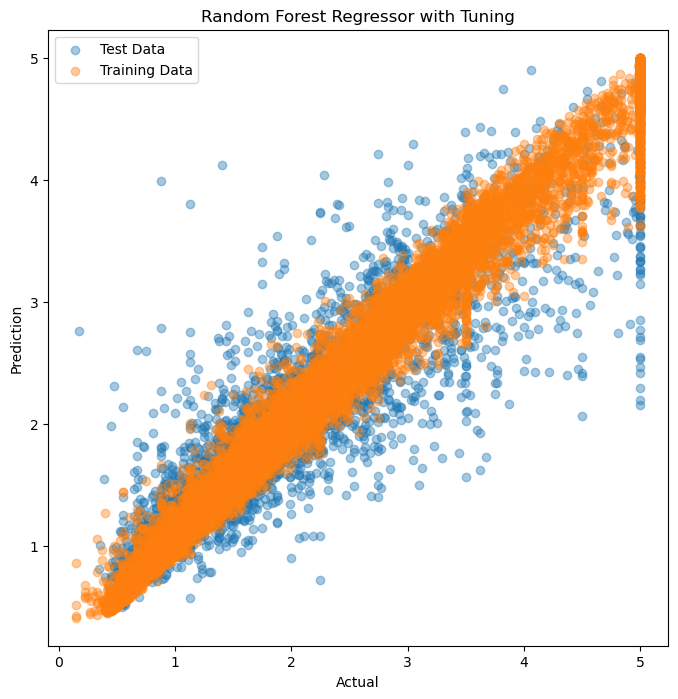

In [36]:
plt.figure(figsize= (8, 8))
plt.scatter(x= y_test, y= grid_search.predict(X_test), label= 'Test Data', alpha= 0.4)
plt.scatter(x= y_train, y= grid_search.predict(X_train), label= 'Training Data', alpha= 0.4)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Random Forest Regressor with Tuning')
plt.legend()
plt.show()

In [37]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.85124192,  1.78785133,  2.57390885,  3.44403915,  5.72209005,
         6.47555594,  9.06616964,  9.06771145, 10.22803288, 11.27189212,
         1.96757278,  3.77211423,  5.85538211,  7.86698842,  9.33597054,
        10.90073686, 12.41491046, 14.50936165, 16.18053799, 18.044416  ,
         2.38971   ,  5.07506242,  7.54551735, 10.91812873, 12.68061604,
        15.29922652, 16.29569755, 17.31329255, 21.79352956, 24.26641374,
         3.14052219,  6.29377136,  9.49388623, 12.97766595, 15.79573193,
        19.3617732 , 24.26722155, 25.16911731, 28.35137076, 31.0811687 ]),
 'std_fit_time': array([0.02260466, 0.14746141, 0.22136422, 0.34355349, 1.59829318,
        0.3482581 , 1.63339929, 0.36302727, 0.48933329, 0.33732691,
        0.20203877, 0.33488729, 0.42518295, 0.23578603, 0.38812264,
        0.37828088, 0.41196787, 0.25549087, 0.47068669, 0.48114714,
        0.03931373, 0.28629378, 0.22302964, 1.10689566, 0.6216644 ,
        0.37261276, 1.98649266, 1.7379123

In [38]:
np.array(list(zip(grid_search.cv_results_['params'], np.sqrt(-grid_search.cv_results_['mean_test_score']))))

array([[{'max_features': 0.25, 'n_estimators': 25}, 0.5143888838900327],
       [{'max_features': 0.25, 'n_estimators': 50}, 0.5027452343980509],
       [{'max_features': 0.25, 'n_estimators': 75}, 0.49835780436093186],
       [{'max_features': 0.25, 'n_estimators': 100}, 0.49646939779461463],
       [{'max_features': 0.25, 'n_estimators': 125}, 0.49636567018901784],
       [{'max_features': 0.25, 'n_estimators': 150}, 0.49498273898861145],
       [{'max_features': 0.25, 'n_estimators': 175}, 0.49479762878291483],
       [{'max_features': 0.25, 'n_estimators': 200}, 0.4948746874495318],
       [{'max_features': 0.25, 'n_estimators': 225}, 0.49477157429577473],
       [{'max_features': 0.25, 'n_estimators': 250}, 0.49499519900089756],
       [{'max_features': 0.5, 'n_estimators': 25}, 0.5153143511396769],
       [{'max_features': 0.5, 'n_estimators': 50}, 0.5084207206779231],
       [{'max_features': 0.5, 'n_estimators': 75}, 0.5048998735941704],
       [{'max_features': 0.5, 'n_estimat

In [53]:
dict(zip(X_train.columns, grid_search.best_estimator_.feature_importances_))

{'MedInc': 0.3646284598030932,
 'HouseAge': 0.05725784471237639,
 'AveRooms': 0.10827984068955525,
 'AveBedrms': 0.04371805203069059,
 'Population': 0.03619544788066126,
 'AveOccup': 0.1203367562066926,
 'Latitude': 0.13479481854893827,
 'Longitude': 0.1347887801279925}